## Kaggle – DataTops®
Luismi ha decidido cambiar de aires y, por eso, ha comprado una tienda de portátiles. Sin embargo, su única especialidad es Data Science, por lo que ha decidido crear un modelo de ML para establecer los mejores precios.

¿Podrías ayudar a Luismi a mejorar ese modelo?

## Métrica: 
Error de raíz cuadrada media (RMSE) es la desviación estándar de los valores residuales (errores de predicción). Los valores residuales son una medida de la distancia de los puntos de datos de la línea de regresión; RMSE es una medida de cuál es el nivel de dispersión de estos valores residuales. En otras palabras, le indica el nivel de concentración de los datos en la línea de mejor ajuste.


$$ RMSE = \sqrt{\frac{1}{n}\Sigma_{i=1}^{n}{\Big(\frac{d_i -f_i}{\sigma_i}\Big)^2}}$$


## Librerías

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import toolbox_ML as tb
import bootcampviztools as bt

from PIL import Image
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
import urllib.request

## Datos

In [56]:
# Para que funcione necesitas bajarte los archivos de datos de Kaggle 
df = pd.read_csv("./data/train.csv", index_col = 0)
df.index.name = None

In [57]:
df_bck_up = df.copy()

## Exploración de los datos

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 912 entries, 755 to 229
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           912 non-null    object 
 1   Product           912 non-null    object 
 2   TypeName          912 non-null    object 
 3   Inches            912 non-null    float64
 4   ScreenResolution  912 non-null    object 
 5   Cpu               912 non-null    object 
 6   Ram               912 non-null    object 
 7   Memory            912 non-null    object 
 8   Gpu               912 non-null    object 
 9   OpSys             912 non-null    object 
 10  Weight            912 non-null    object 
 11  Price_in_euros    912 non-null    float64
dtypes: float64(2), object(10)
memory usage: 92.6+ KB


In [59]:
df.isna().sum()

Company             0
Product             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price_in_euros      0
dtype: int64

In [60]:
df.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
755,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.86kg,539.00
618,Dell,Inspiron 7559,Gaming,15.6,Full HD 1920x1080,Intel Core i7 6700HQ 2.6GHz,16GB,1TB HDD,Nvidia GeForce GTX 960<U+039C>,Windows 10,2.59kg,879.01
909,HP,ProBook 450,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8GB,1TB HDD,Nvidia GeForce 930MX,Windows 10,2.04kg,900.00
2,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,898.94
286,Dell,Inspiron 3567,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,AMD Radeon R5 M430,Linux,2.25kg,428.00


In [61]:
df.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price_in_euros
28,Dell,Inspiron 5570,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,8GB,256GB SSD,AMD Radeon 530,Windows 10,2.2kg,800.00
1160,HP,Spectre Pro,2 in 1 Convertible,13.3,Full HD / Touchscreen 1920x1080,Intel Core i5 6300U 2.4GHz,8GB,256GB SSD,Intel HD Graphics 520,Windows 10,1.48kg,1629.00
78,Lenovo,IdeaPad 320-15IKBN,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,2TB HDD,Intel HD Graphics 620,No OS,2.2kg,519.00
23,HP,255 G6,Notebook,15.6,1366x768,AMD E-Series E2-9000e 1.5GHz,4GB,500GB HDD,AMD Radeon R2,No OS,1.86kg,258.00
229,Dell,Alienware 17,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,4.42kg,2456.34


In [62]:
tb.describe_df(df)

,DATA_TYPE,MISSINGS (%),UNIQUE_VALUES,CARDIN (%)
Company,object,0,19,2.08
Product,object,0,480,52.63
TypeName,object,0,6,0.66
Inches,float64,0,17,1.86
ScreenResolution,object,0,36,3.95
Cpu,object,0,107,11.73
Ram,object,0,9,0.99
Memory,object,0,37,4.06
Gpu,object,0,93,10.2
OpSys,object,0,9,0.99


In [63]:
tb.tipifica_variables(df)

,variable,tipo
0,Company,Numérica Discreta
1,Product,Numérica Continua
2,TypeName,Categórica
3,Inches,Numérica Discreta
4,ScreenResolution,Numérica Discreta
5,Cpu,Numérica Discreta
6,Ram,Categórica
7,Memory,Numérica Discreta
8,Gpu,Numérica Discreta
9,OpSys,Categórica


## Procesado de datos

Nuestro target es la columna `Price_in_euros`

In [64]:
target = "Price_in_euros"

In [65]:
df.drop_duplicates(keep = "first", inplace = True)

In [66]:
df["inches"] = df.Inches.astype(float)
df['ram_gb'] = df['Ram'].str.replace('GB', '').astype(int)
df["weight_kg"] = df['Weight'].str.replace('kg', '').astype(float)
df.drop(columns = ["Inches", "Ram", "Weight"], inplace = True)

In [67]:
# Vemos los valores de Cpu para ver si podemos tratar esta columna:
df.Cpu.value_counts()

Cpu
Intel Core i5 7200U 2.5GHz              124
Intel Core i7 7700HQ 2.8GHz             105
Intel Core i7 7500U 2.7GHz               95
Intel Core i5 8250U 1.6GHz               52
Intel Core i7 8550U 1.8GHz               47
                                       ... 
Intel Core M 1.1GHz                       1
AMD E-Series 9000e 1.5GHz                 1
Intel Core i7 6560U 2.2GHz                1
Intel Core i5 6440HQ 2.6GHz               1
Intel Pentium Dual Core N4200 1.1GHz      1
Name: count, Length: 107, dtype: int64

In [68]:
# Tratamiento de la columna Cpu:
df["cpu_brand"] = df["Cpu"].apply(lambda x: x.split()[0])
df["cpu_speed"] = df["Cpu"].apply(lambda x: float(x.split()[-1].replace("GHz", "")))
df.drop(columns = ["Cpu"], inplace = True)
df.cpu_brand.value_counts()

cpu_brand
Intel    850
AMD       41
Name: count, dtype: int64

In [69]:
# Hacemos un One Hot Encoding para estas cuatro variables categóricas que tienen pocas categorías:
columns_dummies = ["Company", "TypeName", "OpSys", "cpu_brand"]

df = pd.get_dummies(df, columns = columns_dummies, dtype = int)

In [70]:
df.Memory.value_counts()

Memory
256GB SSD                        282
1TB HDD                          146
500GB HDD                         86
512GB SSD                         80
128GB SSD +  1TB HDD              67
128GB SSD                         52
256GB SSD +  1TB HDD              52
32GB Flash Storage                32
1TB SSD                           12
64GB Flash Storage                 9
512GB SSD +  1TB HDD               8
2TB HDD                            8
256GB Flash Storage                7
16GB Flash Storage                 6
256GB SSD +  2TB HDD               6
32GB SSD                           5
128GB Flash Storage                4
1.0TB Hybrid                       4
180GB SSD                          3
16GB SSD                           3
512GB SSD +  2TB HDD               2
1TB SSD +  1TB HDD                 2
1TB HDD +  1TB HDD                 1
512GB Flash Storage                1
1.0TB HDD                          1
256GB SSD +  500GB HDD             1
8GB SSD                        

In [71]:
# Definimos una función para procesar los strings de la columna Memory:
def process_memory(mem):
    mem = mem.lower().replace("tb", "000").replace("gb", "").replace(".", "")
    parts = mem.split("+")
    ssd, ssd_mem, hdd, hdd_mem, flash, flash_mem = 0, 0, 0, 0, 0, 0
    for part in parts:
        if "ssd" in part:
            ssd += 1
            ssd_mem += int(part.strip().replace("ssd", ""))
        elif "hdd" in part:
            hdd += 1
            hdd_mem += int(part.strip().replace("hdd", ""))
        elif "flash" in part or "hybrid" in part:
            flash += 1
            flash_mem += int(part.strip().replace("flash storage", "").replace("hybrid", ""))
    return pd.Series([ssd, ssd_mem, hdd, hdd_mem, flash, flash_mem])

df[["ssd", "ssd_mem", "hdd", "hdd_mem", "flash", "flash_mem"]] = df["Memory"].apply(process_memory)
df.drop(columns = "Memory", inplace = True)

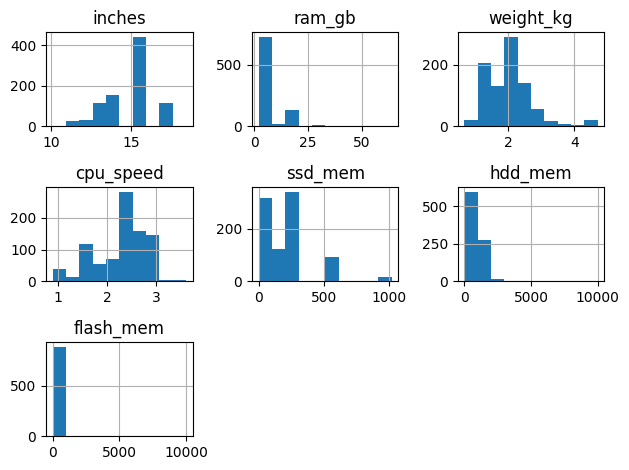

In [72]:
num_feat = ["inches", "ram_gb", "weight_kg", "cpu_speed", "ssd_mem", "hdd_mem", "flash_mem"]
df[num_feat].hist()
plt.tight_layout()

In [73]:
# Podemos intentar normalizar un poco más la columna de ram_gb utilizando un logaritmo:
for col in ["ram_gb", "ssd_mem", "hdd_mem", "flash_mem"]:
    df[col] = np.log(df[col]+1)

In [74]:
df.head()

,Product,ScreenResolution,Gpu,Price_in_euros,inches,ram_gb,weight_kg,cpu_speed,Company_Acer,Company_Apple,...,OpSys_Windows 7,OpSys_macOS,cpu_brand_AMD,cpu_brand_Intel,ssd,ssd_mem,hdd,hdd_mem,flash,flash_mem
755,250 G6,Full HD 1920x1080,Intel HD Graphics 520,539.00,15.6,2.197225,1.86,2.0,0,0,...,0,0,0,1,1,5.549076,0,0.000000,0,0.000000
618,Inspiron 7559,Full HD 1920x1080,Nvidia GeForce GTX 960<U+039C>,879.01,15.6,2.833213,2.59,2.6,0,0,...,0,0,0,1,0,0.000000,1,6.908755,0,0.000000
909,ProBook 450,Full HD 1920x1080,Nvidia GeForce 930MX,900.00,15.6,2.197225,2.04,2.7,0,0,...,0,0,0,1,0,0.000000,1,6.908755,0,0.000000
2,Macbook Air,1440x900,Intel HD Graphics 6000,898.94,13.3,2.197225,1.34,1.8,0,1,...,0,1,0,1,0,0.000000,0,0.000000,1,4.859812
286,Inspiron 3567,Full HD 1920x1080,AMD Radeon R5 M430,428.00,15.6,1.609438,2.25,2.0,0,0,...,0,0,0,1,0,0.000000,1,6.908755,0,0.000000


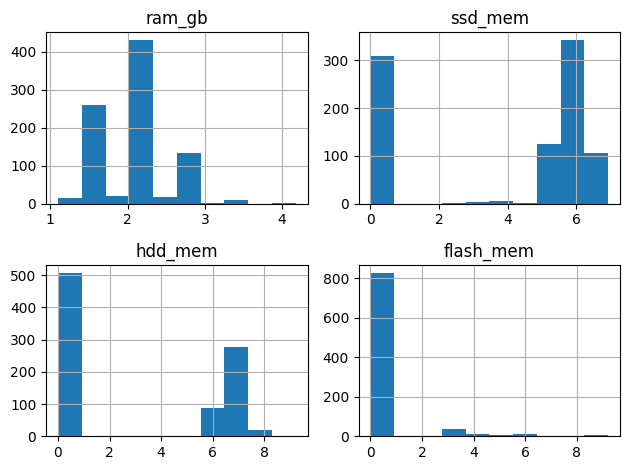

In [76]:
df[["ram_gb", "ssd_mem", "hdd_mem", "flash_mem"]].hist()
plt.tight_layout()

In [77]:
feat_sel = list(df.columns)
feat_sel.remove("Product")
feat_sel.remove("Price_in_euros")
feat_sel.remove("ScreenResolution")
feat_sel.remove("Gpu")
feat_sel

['inches',
 'ram_gb',
 'weight_kg',
 'cpu_speed',
 'Company_Acer',
 'Company_Apple',
 'Company_Asus',
 'Company_Chuwi',
 'Company_Dell',
 'Company_Fujitsu',
 'Company_Google',
 'Company_HP',
 'Company_Huawei',
 'Company_LG',
 'Company_Lenovo',
 'Company_MSI',
 'Company_Mediacom',
 'Company_Microsoft',
 'Company_Razer',
 'Company_Samsung',
 'Company_Toshiba',
 'Company_Vero',
 'Company_Xiaomi',
 'TypeName_2 in 1 Convertible',
 'TypeName_Gaming',
 'TypeName_Netbook',
 'TypeName_Notebook',
 'TypeName_Ultrabook',
 'TypeName_Workstation',
 'OpSys_Android',
 'OpSys_Chrome OS',
 'OpSys_Linux',
 'OpSys_Mac OS X',
 'OpSys_No OS',
 'OpSys_Windows 10',
 'OpSys_Windows 10 S',
 'OpSys_Windows 7',
 'OpSys_macOS',
 'cpu_brand_AMD',
 'cpu_brand_Intel',
 'ssd',
 'ssd_mem',
 'hdd',
 'hdd_mem',
 'flash',
 'flash_mem']

-----------------------------------------------------------------------------------------------------------------

## Modelado

### 1. Definir X e y

In [78]:
X = df[feat_sel]
y = df[target]

### 2. Dividir X_train, X_test, y_train, y_test

In [79]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

In [80]:
X_train.head()

,inches,ram_gb,weight_kg,cpu_speed,Company_Acer,Company_Apple,Company_Asus,Company_Chuwi,Company_Dell,Company_Fujitsu,...,OpSys_Windows 7,OpSys_macOS,cpu_brand_AMD,cpu_brand_Intel,ssd,ssd_mem,hdd,hdd_mem,flash,flash_mem
112,14.0,2.197225,1.58,2.7,0,0,0,0,0,0,...,0,0,0,1,1,5.549076,0,0.000000,0,0.0
13,15.4,2.833213,1.83,2.8,0,1,0,0,0,0,...,0,1,0,1,1,5.549076,0,0.000000,0,0.0
1190,15.6,1.609438,2.20,1.6,0,0,1,0,0,0,...,0,0,0,1,0,0.000000,1,6.216606,0,0.0
55,15.6,1.609438,2.40,2.4,1,0,0,0,0,0,...,0,0,0,1,0,0.000000,1,6.908755,0,0.0
1043,17.3,2.197225,2.63,2.5,0,0,0,0,0,0,...,0,0,0,1,1,5.549076,0,0.000000,0,0.0


In [81]:
y_train.head()

112     1480.00
13      2439.97
1190     369.00
55       384.00
1043    1080.00
Name: Price_in_euros, dtype: float64

### 3. Baseline de modelos


In [83]:
model_names = ["Random Forest", "XGBoost", "LightGBM", "Catboost"]
rf_reg = RandomForestRegressor(random_state = 42)
xg_reg = XGBRFRegressor(random_state = 42)
lgb_reg = LGBMRegressor(random_state = 42, verbose = -100, n_jobs = -1)
cat_reg = CatBoostRegressor(n_estimators = 100, depth = 5, learning_rate = 0.5, verbose = 100)
models = [rf_reg, xg_reg, lgb_reg, cat_reg]

resultados = []

for model_name, modelo in zip(model_names, models):
    metrica = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring  = "neg_root_mean_squared_error"))
    data = {
        "model": model_name,
        "RSME": metrica
    }
    print(data)
    resultados.append(data.copy())
df_resultados = pd.DataFrame(resultados)
df_resultados.sort_values("RSME", ascending = False)

{'model': 'Random Forest', 'RSME': -321.0174753883624}
{'model': 'XGBoost', 'RSME': -329.1845971608989}
{'model': 'LightGBM', 'RSME': -328.0641918829282}
0:	learn: 525.7339211	total: 134ms	remaining: 13.3s
99:	learn: 127.8857710	total: 216ms	remaining: 0us
0:	learn: 499.9081048	total: 1.18ms	remaining: 117ms
99:	learn: 122.8011073	total: 87.8ms	remaining: 0us
0:	learn: 525.3797532	total: 975us	remaining: 96.5ms
99:	learn: 119.8677108	total: 89.1ms	remaining: 0us
0:	learn: 538.7374997	total: 1.01ms	remaining: 100ms
99:	learn: 119.2562170	total: 84.6ms	remaining: 0us
0:	learn: 504.0798245	total: 953us	remaining: 94.4ms
99:	learn: 126.0660144	total: 86.2ms	remaining: 0us
{'model': 'Catboost', 'RSME': -295.63365721982234}


,model,RSME
3,Catboost,-295.633657
0,Random Forest,-321.017475
2,LightGBM,-328.064192
1,XGBoost,-329.184597


In [84]:
cat_reg.fit(X_train, y_train)

0:	learn: 520.7081188	total: 1.78ms	remaining: 176ms
99:	learn: 137.9447235	total: 106ms	remaining: 0us


In [85]:
y_pred = cat_reg.predict(X_test)

In [112]:
# cat_reg = CatBoostRegressor(n_estimators = 100, depth = 5, learning_rate = 0.5, verbose = 100)

cat_reg = CatBoostRegressor(verbose = 100)

param_grid = {
    'iterations': [500, 1000, 2000],  # Cuántos árboles usar
    'learning_rate': [0.01, 0.05, 0.1],  # Tasa de aprendizaje
    'depth': [4, 8, 10],  # Profundidad de los árboles
    'l2_leaf_reg': [1, 4, 10],  # Regularización L2
    'colsample_bylevel': [0.8, 1]  # Porcentaje de features usadas por nivel del árbol
}

grid_model = RandomizedSearchCV(cat_reg, param_distributions = param_grid, n_iter = 50, scoring = "neg_root_mean_squared_error", cv = 4, n_jobs= -1, random_state = 42)

grid_model.fit(X_train, y_train)

print(grid_model.best_score_)
best_model = grid_model.best_estimator_

0:	learn: 660.8713008	total: 1.11ms	remaining: 557ms
100:	learn: 270.9510614	total: 82.5ms	remaining: 326ms
200:	learn: 230.3566236	total: 161ms	remaining: 239ms
300:	learn: 207.1285182	total: 241ms	remaining: 160ms
400:	learn: 190.4191732	total: 319ms	remaining: 78.7ms
499:	learn: 177.6207292	total: 405ms	remaining: 0us
-289.0329493632862


### 4. Sacar métricas, valorar los modelos 

Recuerda que en la competición se va a evaluar con la métrica de ``RMSE``.

In [113]:
y_pred = best_model.predict(X_test)

In [114]:
print(np.sqrt(mean_squared_error(y_test, y_pred)))

297.13767107308763


-----------------------------------------------------------------

## Una vez listo el modelo, toca predecir ``test.csv``

**RECUERDA: APLICAR LAS TRANSFORMACIONES QUE HAYAS REALIZADO EN `train.csv` a `test.csv`.**


Véase:
- Estandarización/Normalización
- Eliminación de Outliers
- Eliminación de columnas
- Creación de columnas nuevas
- Gestión de valores nulos
- Y un largo etcétera de técnicas que como Data Scientist hayas considerado las mejores para tu dataset.

### 1. Carga los datos de `test.csv` para predecir.


In [97]:
X_pred = pd.read_csv("data/test.csv", index_col = 0)
X_pred.index.name = None
X_pred.head()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
209,Lenovo,Legion Y520-15IKBN,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD,Nvidia GeForce GTX 1060,No OS,2.4kg
1281,Acer,Aspire ES1-531,Notebook,15.6,1366x768,Intel Celeron Dual Core N3060 1.6GHz,4GB,500GB HDD,Intel HD Graphics 400,Linux,2.4kg
1168,Lenovo,V110-15ISK (i3-6006U/4GB/1TB/No,Notebook,15.6,1366x768,Intel Core i3 6006U 2.0GHz,4GB,1TB HDD,Intel HD Graphics 520,No OS,1.9kg
1231,Dell,Inspiron 7579,2 in 1 Convertible,15.6,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,2.191kg
1020,HP,ProBook 640,Notebook,14.0,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,4GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.95kg


In [98]:
X_pred.tail()

,Company,Product,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight
820,MSI,GE72MVR 7RG,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16GB,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,2.9kg
948,Toshiba,Tecra Z40-C-12X,Notebook,14.0,IPS Panel Full HD 1920x1080,Intel Core i5 6200U 2.3GHz,4GB,128GB SSD,Intel HD Graphics 520,Windows 10,1.47kg
483,Dell,Precision M5520,Workstation,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8GB,256GB SSD,Nvidia Quadro M1200,Windows 10,1.78kg
1017,HP,Probook 440,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,4GB,500GB HDD,Intel HD Graphics 620,Windows 10,1.64kg
421,Asus,ZenBook Flip,2 in 1 Convertible,13.3,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,Windows 10,1.27kg


In [99]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           391 non-null    object 
 1   Product           391 non-null    object 
 2   TypeName          391 non-null    object 
 3   Inches            391 non-null    float64
 4   ScreenResolution  391 non-null    object 
 5   Cpu               391 non-null    object 
 6   Ram               391 non-null    object 
 7   Memory            391 non-null    object 
 8   Gpu               391 non-null    object 
 9   OpSys             391 non-null    object 
 10  Weight            391 non-null    object 
dtypes: float64(1), object(10)
memory usage: 36.7+ KB


 ## 2. Replicar el procesado para ``test.csv``

In [100]:
X_pred["inches"] = X_pred.Inches.astype(float)
X_pred['ram_gb'] = X_pred['Ram'].str.replace('GB', '').astype(int)
X_pred["weight_kg"] = X_pred['Weight'].str.replace('kg', '').astype(float)
X_pred.drop(columns = ["Inches", "Ram", "Weight"], inplace = True)

In [101]:
# Tratamiento de la columna Cpu:
X_pred["cpu_brand"] = X_pred["Cpu"].apply(lambda x: x.split()[0])
X_pred["cpu_speed"] = X_pred["Cpu"].apply(lambda x: float(x.split()[-1].replace("GHz", "")))
X_pred.drop(columns = ["Cpu"], inplace = True)

X_pred[["ssd", "ssd_mem", "hdd", "hdd_mem", "flash", "flash_mem"]] = X_pred["Memory"].apply(process_memory)
X_pred.drop(columns = "Memory", inplace = True)

for col in ["ssd", "ssd_mem", "hdd", "hdd_mem", "flash", "flash_mem"]:
    X_pred[col] = np.log(X_pred[col]+1)

# Hacemos un One Hot Encoding para estas cuatro variables categóricas que tienen pocas categorías:
train_columns_dummies = X_train.columns
X_pred = pd.get_dummies(X_pred, columns = columns_dummies, dtype = int).reindex(columns = train_columns_dummies, fill_value=0)

In [102]:
X_pred.info()

<class 'pandas.core.frame.DataFrame'>
Index: 391 entries, 209 to 421
Data columns (total 46 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   inches                       391 non-null    float64
 1   ram_gb                       391 non-null    int32  
 2   weight_kg                    391 non-null    float64
 3   cpu_speed                    391 non-null    float64
 4   Company_Acer                 391 non-null    int32  
 5   Company_Apple                391 non-null    int32  
 6   Company_Asus                 391 non-null    int32  
 7   Company_Chuwi                391 non-null    int32  
 8   Company_Dell                 391 non-null    int32  
 9   Company_Fujitsu              391 non-null    int32  
 10  Company_Google               391 non-null    int32  
 11  Company_HP                   391 non-null    int32  
 12  Company_Huawei               391 non-null    int64  
 13  Company_LG             

In [115]:
predictions_submit = best_model.predict(X_pred)
predictions_submit

array([2420.28458669, 1183.10262841, 1203.89792156, 2181.92771671,
       1950.18761994, 1413.06059757, 1441.69333077, 1756.44881774,
       1850.13828236,  881.87545721, 2806.26229693, 2236.26869257,
       1151.88500496, 2908.30893945, 1539.14702613, 1565.54315274,
       2938.71749598, 2065.63588211, 3081.54313859, 1739.97735274,
       1943.10809753, 1077.81264652, 1419.99935975, 2323.91495388,
       1285.94278381, 1085.2471621 , 1160.95597484, 1693.2294195 ,
       2896.33456316, 1841.89513451, 2746.51619123, 1031.63654771,
       1845.45412552, 2884.44957058, 3193.8239478 , 2623.60109831,
       1320.08866076, 1807.29056663, 1406.83707175, 2383.87259653,
       1119.7067318 , 1830.30545707, 1566.69779235, 2236.65372617,
       1202.72979459, 2037.87339936, 1894.43341679, 1450.29895486,
       1680.36964833, 1347.47080806, 2605.20328026, 1074.43007684,
       2158.11405435, 1543.3885241 , 2265.87266966, 2579.73295937,
       1717.23575167, 1190.07300548, 1474.10386846, 1237.93463

### 3. **¿Qué es lo que subirás a Kaggle?**

**Para subir a Kaggle la predicción esta tendrá que tener una forma específica.**

En este caso, la **MISMA** forma que `sample_submission.csv`. 

In [116]:
sample = pd.read_csv("data/sample_submission.csv")

In [117]:
sample.head()

,laptop_ID,Price_in_euros
0,209,1949.1
1,1281,805.0
2,1168,1101.0
3,1231,1293.8
4,1020,1832.6


In [118]:
sample.shape

(391, 2)

### 4. Mete tus predicciones en un dataframe llamado ``submission``.

In [119]:
#¿Cómo creamos la submission?
submission = pd.DataFrame({"laptop_ID": X_pred.index,
                        "Price_in_euros": predictions_submit})

In [120]:
submission.head()

,laptop_ID,Price_in_euros
0,209,2420.284587
1,1281,1183.102628
2,1168,1203.897922
3,1231,2181.927717
4,1020,1950.187620


In [121]:
submission.shape

(391, 2)

### 5. Pásale el CHEQUEADOR para comprobar que efectivamente está listo para subir a Kaggle.

In [122]:
def chequeador(df_to_submit):
    """
    Esta función se asegura de que tu submission tenga la forma requerida por Kaggle.
    
    Si es así, se guardará el dataframe en un `csv` y estará listo para subir a Kaggle.
    
    Si no, LEE EL MENSAJE Y HAZLE CASO.
    
    Si aún no:
    - apaga tu ordenador, 
    - date una vuelta, 
    - enciendelo otra vez, 
    - abre este notebook y 
    - leelo todo de nuevo. 
    Todos nos merecemos una segunda oportunidad. También tú.
    """
    if df_to_submit.shape == sample.shape:
        if df_to_submit.columns.all() == sample.columns.all():
            if df_to_submit.laptop_ID.all() == sample.laptop_ID.all():
                print("You're ready to submit!")
                submission.to_csv("submission.csv", index = False) #muy importante el index = False
                urllib.request.urlretrieve("https://www.mihaileric.com/static/evaluation-meme-e0a350f278a36346e6d46b139b1d0da0-ed51e.jpg", "gfg.png")     
                img = Image.open("gfg.png")
                img.show()   
            else:
                print("Check the ids and try again")
        else:
            print("Check the names of the columns and try again")
    else:
        print("Check the number of rows and/or columns and try again")
        print("\nMensaje secreto del TA: No me puedo creer que después de todo este notebook hayas hecho algún cambio en las filas de `test.csv`. Lloro.")

In [123]:
chequeador(submission)

You're ready to submit!
